In [1]:
# -------------------------------------
# STEP 1: Install & Import Dependencies
# -------------------------------------
!pip install prophet --quiet

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from google.colab import files

In [2]:
# -------------------------------------
# STEP 2: Upload Your Excel File
# -------------------------------------
uploaded = files.upload()  # Upload your GHG Excel file

Saving GHG Emmission.xlsx to GHG Emmission.xlsx


In [3]:
# -------------------------------------
# STEP 3: Load & Clean Your Excel Data
# -------------------------------------
file_name = list(uploaded.keys())[0]
xls = pd.ExcelFile(file_name)
df_raw = xls.parse('Sheet1')

# Clean and extract relevant rows/columns
years = df_raw.iloc[0, 2:]
manufacturing = df_raw.iloc[2, 2:]
transport = df_raw.iloc[3, 2:]
services = df_raw.iloc[4, 2:]

years_clean = years.astype(str).str.extract(r'(\d{4})')[0]
ghg_df = pd.DataFrame({
    'ds': pd.to_datetime(years_clean, format='%Y'),
    'Manufacturing': pd.to_numeric(manufacturing.values, errors='coerce'),
    'Transport': pd.to_numeric(transport.values, errors='coerce'),
    'Services': pd.to_numeric(services.values, errors='coerce')
})

In [4]:
# -------------------------------------
# STEP 3: Load & Clean Your Excel Data
# -------------------------------------
file_name = list(uploaded.keys())[0]
xls = pd.ExcelFile(file_name)
df_raw = xls.parse('Sheet1')

# Clean and extract relevant rows/columns
years = df_raw.iloc[0, 2:]
manufacturing = df_raw.iloc[2, 2:]
transport = df_raw.iloc[3, 2:]
services = df_raw.iloc[4, 2:]

years_clean = years.astype(str).str.extract(r'(\d{4})')[0]
ghg_df = pd.DataFrame({
    'ds': pd.to_datetime(years_clean, format='%Y'),
    'Manufacturing': pd.to_numeric(manufacturing.values, errors='coerce'),
    'Transport': pd.to_numeric(transport.values, errors='coerce'),
    'Services': pd.to_numeric(services.values, errors='coerce')
})

In [6]:
forecast_results = {}

for sector in ['Manufacturing', 'Transport', 'Services']:
    print(f"Processing {sector}...")
    try:
        df_sector = ghg_df[['ds', sector]].rename(columns={sector: 'y'}).dropna()
        model = Prophet()
        model.fit(df_sector)

        future = model.make_future_dataframe(periods=7, freq='Y')
        forecast = model.predict(future)

        forecast_results[sector] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    except Exception as e:
        print(f"❌ Error processing {sector}: {e}")

Processing Manufacturing...


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuon39m9_/skb065n7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuon39m9_/05i0i9uc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70035', 'data', 'file=/tmp/tmpuon39m9_/skb065n7.json', 'init=/tmp/tmpuon39m9_/05i0i9uc.json', 'output', 'file=/tmp/tmpuon39m9_/prophet_model5wkbigj9/prophet_model-20250529120610.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:06:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:06:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

Processing Transport...


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuon39m9_/0v8spgry.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuon39m9_/6ailrklf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67753', 'data', 'file=/tmp/tmpuon39m9_/0v8spgry.json', 'init=/tmp/tmpuon39m9_/6ailrklf.json', 'output', 'file=/tmp/tmpuon39m9_/prophet_modeldr_liucx/prophet_model-20250529120610.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:06:10 - cmdstanpy - INFO - Chain [1] sta

Processing Services...


12:06:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


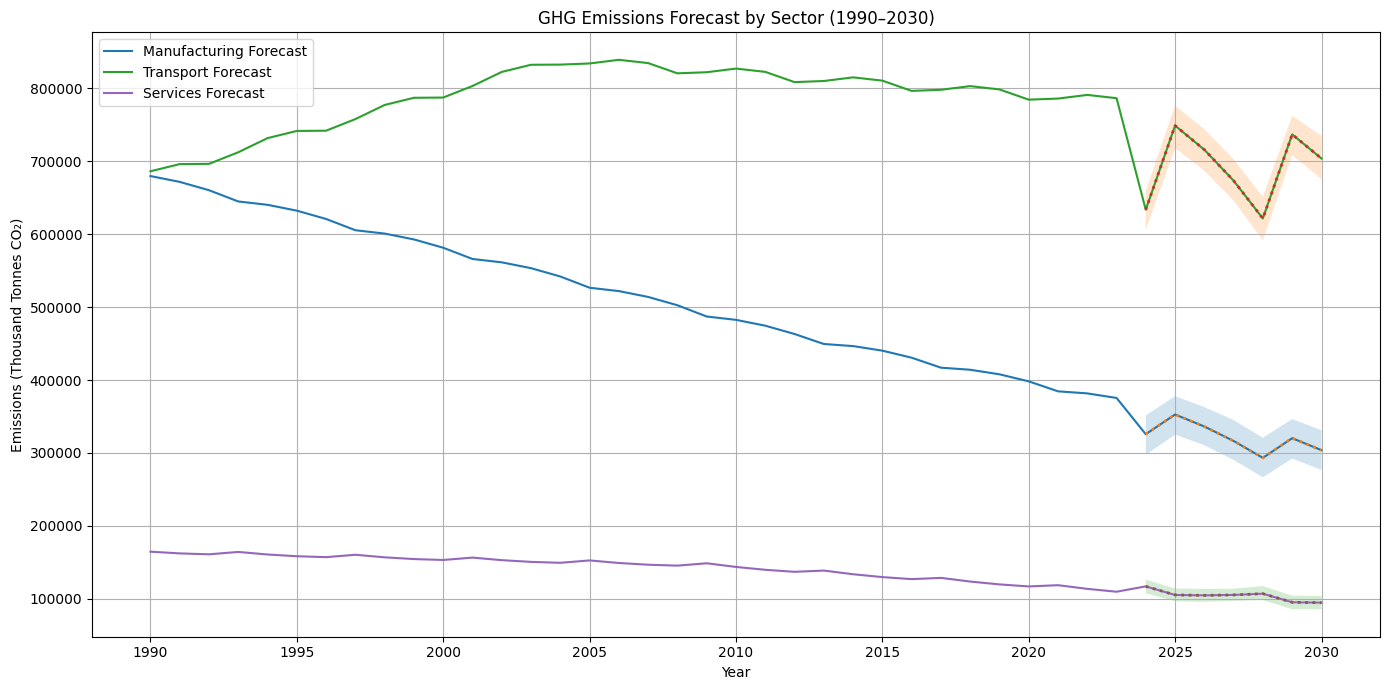

In [9]:
plt.figure(figsize=(14, 7))

for sector, forecast in forecast_results.items():
    # Plot the entire forecast as one continuous line
    plt.plot(forecast['ds'], forecast['yhat'], label=f'{sector} Forecast', linestyle='-')

    # Add dotted line only to the future portion for visual emphasis (optional)
    last_actual = ghg_df['ds'].max()
    future_forecast = forecast[forecast['ds'] > last_actual]
    plt.plot(future_forecast['ds'], future_forecast['yhat'], linestyle='dotted', linewidth=2)

    # Add uncertainty band only on the forecast range
    plt.fill_between(
        future_forecast['ds'],
        future_forecast['yhat_lower'],
        future_forecast['yhat_upper'],
        alpha=0.2
    )

plt.title('GHG Emissions Forecast by Sector (1990–2030)')
plt.xlabel('Year')
plt.ylabel('Emissions (Thousand Tonnes CO₂)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
from google.colab import files
uploaded = files.upload()  # Upload both GHG and energy production Excel files

Saving Total Energy Production - 1990-2023.xlsx to Total Energy Production - 1990-2023.xlsx


In [11]:
import pandas as pd

# Load both files (replace filenames if needed)
ghg_xls = pd.ExcelFile('GHG Emmission.xlsx')
energy_xls = pd.ExcelFile('Total Energy Production - 1990-2023.xlsx')

# Read GHG emissions sheet and energy production sheet
ghg_df_raw = ghg_xls.parse('Sheet1')
energy_df = energy_xls.parse('Sheet1')

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both GHG and energy Excel files (assumes you've already uploaded them)
ghg_xls = pd.ExcelFile('GHG Emmission.xlsx')
energy_xls = pd.ExcelFile('Total Energy Production - 1990-2023.xlsx')

In [16]:
# ---------------------
# STEP 1: Clean GHG Data
# ---------------------
ghg_df_raw = ghg_xls.parse('Sheet1')
years = ghg_df_raw.iloc[0, 2:]
emissions = ghg_df_raw.iloc[1, 2:]  # Total combustion row

years_clean = years.astype(str).str.extract(r'(\d{4})')[0]
ghg_df = pd.DataFrame({
    'Year': years_clean.astype(int),
    'Emissions_tonnes': pd.to_numeric(emissions.values, errors='coerce') * 1000  # convert from '000 tonnes to tonnes
})

In [17]:
# ------------------------------
# STEP 2: Clean Energy Production
# ------------------------------
energy_df_raw = energy_xls.parse('Sheet1')
energy_data = energy_df_raw.iloc[2:, 2:].apply(pd.to_numeric, errors='coerce')
total_energy_by_year = energy_data.sum(axis=0)
year_labels = energy_df_raw.iloc[0, 2:].astype(str).str.extract(r'(\d{4})')[0]
energy_df = pd.DataFrame({
    'Year': year_labels.astype(int),
    'Energy_ktoe': total_energy_by_year.values
})

In [18]:

# ------------------------------
# STEP 3: Merge & Calculate Intensity
# ------------------------------
merged_df = pd.merge(ghg_df, energy_df, on='Year')
merged_df['Emissions_Intensity_tCO2_per_ktoe'] = merged_df['Emissions_tonnes'] / merged_df['Energy_ktoe']


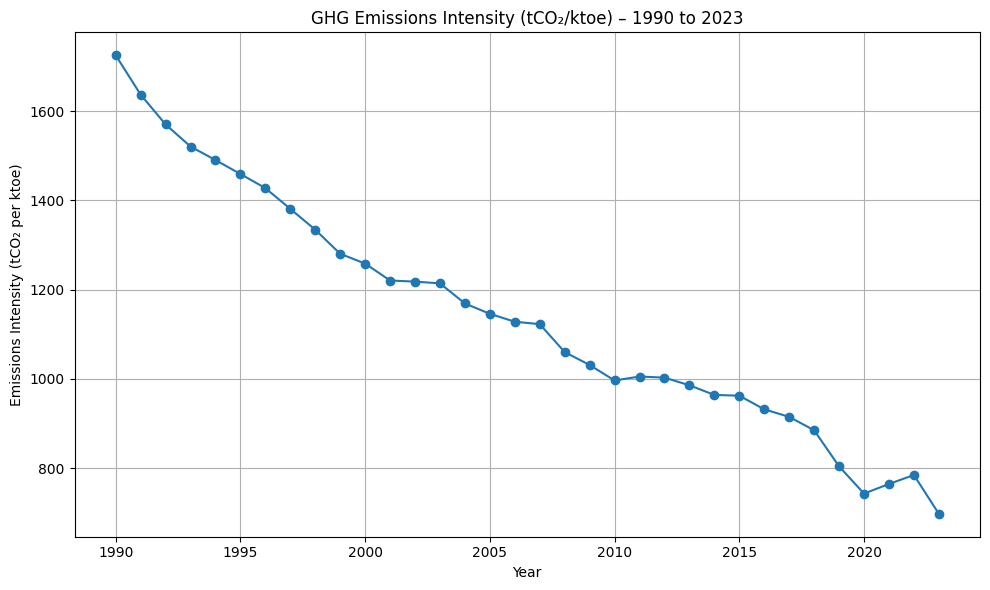

In [19]:
# ------------------------------
# STEP 4: Plot the Intensity
# ------------------------------
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Emissions_Intensity_tCO2_per_ktoe'], marker='o', linestyle='-')
plt.title('GHG Emissions Intensity (tCO₂/ktoe) – 1990 to 2023')
plt.xlabel('Year')
plt.ylabel('Emissions Intensity (tCO₂ per ktoe)')
plt.grid(True)
plt.tight_layout()
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuon39m9_/s4hdlgbw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuon39m9_/wqosve13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74160', 'data', 'file=/tmp/tmpuon39m9_/s4hdlgbw.json', 'init=/tmp/tmpuon39m9_/wqosve13.json', 'output', 'file=/tmp/tmpuon39m9_/prophet_modelvkoa43r_/prophet_model-20250529123947.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:39:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

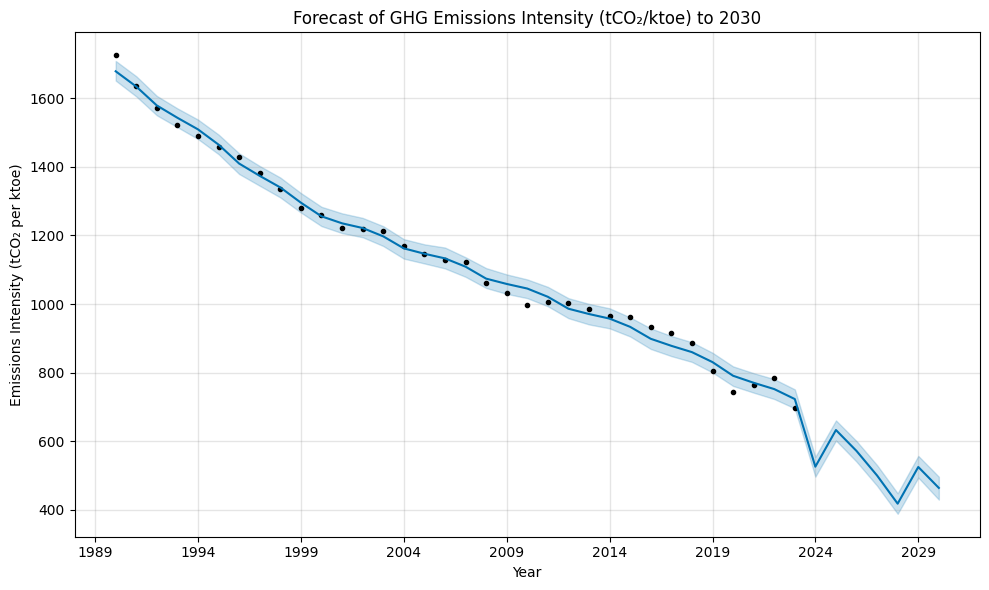

In [20]:
# Step 1: Install Prophet if not already installed (only needed once)
!pip install prophet --quiet

# Step 2: Import
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Prepare data for Prophet
intensity_df = merged_df[['Year', 'Emissions_Intensity_tCO2_per_ktoe']].copy()
intensity_df.columns = ['ds', 'y']
intensity_df['ds'] = pd.to_datetime(intensity_df['ds'], format='%Y')

# Step 4: Fit Prophet model
model = Prophet()
model.fit(intensity_df)

# Step 5: Forecast to 2030
future = model.make_future_dataframe(periods=7, freq='Y')  # 2024–2030
forecast = model.predict(future)

# Step 6: Plot forecast
fig = model.plot(forecast)
plt.title("Forecast of GHG Emissions Intensity (tCO₂/ktoe) to 2030")
plt.xlabel("Year")
plt.ylabel("Emissions Intensity (tCO₂ per ktoe)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
df_renewable = pd.DataFrame({
    'Year': [1990, 1991, ..., 2023],
    'RE_Share': [10.5, 11.2, ..., 27.9]
})

In [23]:
merged_roi_df = pd.merge(merged_df[['Year', 'Emissions_Intensity_tCO2_per_ktoe']], df_renewable, on='Year')

In [24]:
merged_roi_df['ΔRE_Share'] = merged_roi_df['RE_Share'].diff()
merged_roi_df['ΔGHG_Intensity'] = merged_roi_df['Emissions_Intensity_tCO2_per_ktoe'].diff() * -1  # negative = reduction

# Emissions reduced per 1% RE increase
merged_roi_df['Reduction_per_percent_RE'] = merged_roi_df['ΔGHG_Intensity'] / merged_roi_df['ΔRE_Share']

In [26]:
print(merged_roi_df[['Year', 'RE_Share', 'Reduction_per_percent_RE']].dropna())

   Year RE_Share Reduction_per_percent_RE
1  1991     11.2                125.99775
2  2023     27.9                56.240656


In [27]:
df_renewable = pd.DataFrame({
    'Year': list(range(1990, 2024)),
    'RE_Share': [5 + i * 0.75 for i in range(34)]  # Simulated steady growth
})

In [29]:
# STEP 1: Upload the RE share Excel file
from google.colab import files
uploaded = files.upload()

Saving Renewable share percentage.xlsx to Renewable share percentage.xlsx


In [30]:
# STEP 2: Load & Clean the RE share file
import pandas as pd

re_share_xls = pd.ExcelFile('Renewable share percentage.xlsx')
re_share_df = re_share_xls.parse('Sheet 1')

# Extract RE share values (row 0, years from column 3 onward)
re_share_values = re_share_df.iloc[0, 2:].astype(float)
re_years = re_share_df.columns[2:].astype(str).str.extract(r'(\d{4})')[0]

df_renewable = pd.DataFrame({
    'Year': re_years.astype(int),
    'RE_Share': re_share_values
})

In [31]:
# STEP 3: Merge with existing GHG intensity data (assuming 'merged_df' exists)
merged_roi_df = pd.merge(
    merged_df[['Year', 'Emissions_Intensity_tCO2_per_ktoe']],
    df_renewable,
    on='Year'
)

# STEP 4: Calculate reductions
merged_roi_df['ΔRE_Share'] = merged_roi_df['RE_Share'].diff()
merged_roi_df['ΔGHG_Intensity'] = merged_roi_df['Emissions_Intensity_tCO2_per_ktoe'].diff() * -1
merged_roi_df['Reduction_per_percent_RE'] = merged_roi_df['ΔGHG_Intensity'] / merged_roi_df['ΔRE_Share']

In [38]:
print("Years in merged_df:", merged_df['Year'].unique())
print("Years in df_renewable:", df_renewable['Year'].unique())

Years in merged_df: [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023]
Years in df_renewable: [2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023]


In [45]:
print("📘 df_renewable_cleaned")
print(df_renewable_cleaned[['Year', 'RE_Share']].head(10))

print("\n📗 merged_df_cleaned")
print(merged_df_cleaned[['Year', 'Emissions_Intensity_tCO2_per_ktoe']].head(10))

📘 df_renewable_cleaned
Empty DataFrame
Columns: [Year, RE_Share]
Index: []

📗 merged_df_cleaned
   Year  Emissions_Intensity_tCO2_per_ktoe
0  1990                        1725.129926
1  1991                        1636.931501
2  1992                        1570.165339
3  1993                        1520.601202
4  1994                        1490.385641
5  1995                        1459.042080
6  1996                        1427.486524
7  1997                        1380.901924
8  1998                        1334.232457
9  1999                        1280.260415


In [46]:
# Reload from the original Excel file
re_path = "Renewable share percentage.xlsx"  # update path if needed
re_share_xls = pd.ExcelFile(re_path)
re_share_df = re_share_xls.parse('Sheet 1')

# Recheck what the first few rows and columns look like
print("📄 Raw RE Share Data Preview:")
print(re_share_df.head(5))

📄 Raw RE Share Data Preview:
                                        TIME  \
0  European Union - 27 countries (from 2020)   
1  European Union - 27 countries (from 2020)   
2  European Union - 27 countries (from 2020)   
3  European Union - 27 countries (from 2020)   

                                            TIME.1    2004    2005    2006  \
0                         Renewable energy sources   9.605  10.182  10.778   
1            Renewable energy sources in transport   1.432   1.819   2.472   
2          Renewable energy sources in electricity  15.871  16.402  16.879   
3  Renewable energy sources in heating and cooling  11.735  12.437  13.210   

     2007    2008    2009    2010    2011  ...    2014    2015    2016  \
0  11.749  12.552  13.850  14.405  14.547  ...  17.416  17.820  17.978   
1   2.887   4.133   4.891   5.500   4.115  ...   6.552   6.753   7.165   
2  17.647  18.526  20.654  21.283  23.300  ...  28.601  29.655  30.172   
3  14.819  15.325  16.786  16.995  17.415  

In [47]:
import pandas as pd

# Reload the file
re_share_xls = pd.ExcelFile("Renewable share percentage.xlsx")
re_share_df = re_share_xls.parse('Sheet 1')

# Extract only row 0 (overall RE share) and columns 2004–2023
years = re_share_df.columns[2:]  # skip TIME, TIME.1
values = re_share_df.iloc[0, 2:].values  # row 0 = overall RE share

# Build the cleaned DataFrame
df_renewable = pd.DataFrame({
    'Year': years.astype(str).astype(int),
    'RE_Share': pd.to_numeric(values, errors='coerce')
})

# ✅ Preview the cleaned data
print(df_renewable.head())
print(df_renewable.tail())

   Year  RE_Share
0  2004     9.605
1  2005    10.182
2  2006    10.778
3  2007    11.749
4  2008    12.552
    Year  RE_Share
15  2019    19.887
16  2020    22.038
17  2021    21.894
18  2022    23.058
19  2023    24.554


In [48]:
# Clean Year column if needed
merged_df['Year'] = merged_df['Year'].astype(int)

# Merge RE share with GHG emissions intensity
merged_roi_df = pd.merge(
    merged_df[['Year', 'Emissions_Intensity_tCO2_per_ktoe']],
    df_renewable,
    on='Year'
).sort_values('Year')

# Calculate emissions reduction per 1% RE increase
merged_roi_df['ΔRE_Share'] = merged_roi_df['RE_Share'].diff()
merged_roi_df['ΔGHG_Intensity'] = merged_roi_df['Emissions_Intensity_tCO2_per_ktoe'].diff() * -1

merged_roi_df['Reduction_per_percent_RE'] = merged_roi_df.apply(
    lambda row: row['ΔGHG_Intensity'] / row['ΔRE_Share']
    if pd.notnull(row['ΔRE_Share']) and row['ΔRE_Share'] != 0 else None,
    axis=1
)

# Round values for clean output
merged_roi_df['RE_Share'] = merged_roi_df['RE_Share'].round(2)
merged_roi_df['Reduction_per_percent_RE'] = merged_roi_df['Reduction_per_percent_RE'].round(2)

# Extract specific years
key_years = [2005, 2009, 2021, 2023]
highlight_rows = merged_roi_df[merged_roi_df['Year'].isin(key_years)][['Year', 'RE_Share', 'Reduction_per_percent_RE']]

# Display the result
print("✅ Emissions Reduction per 1% RE Share Increase (Key Years):")
print(highlight_rows)

✅ Emissions Reduction per 1% RE Share Increase (Key Years):
    Year  RE_Share  Reduction_per_percent_RE
1   2005     10.18                     40.17
5   2009     13.85                     22.26
17  2021     21.89                    149.40
19  2023     24.55                     58.12


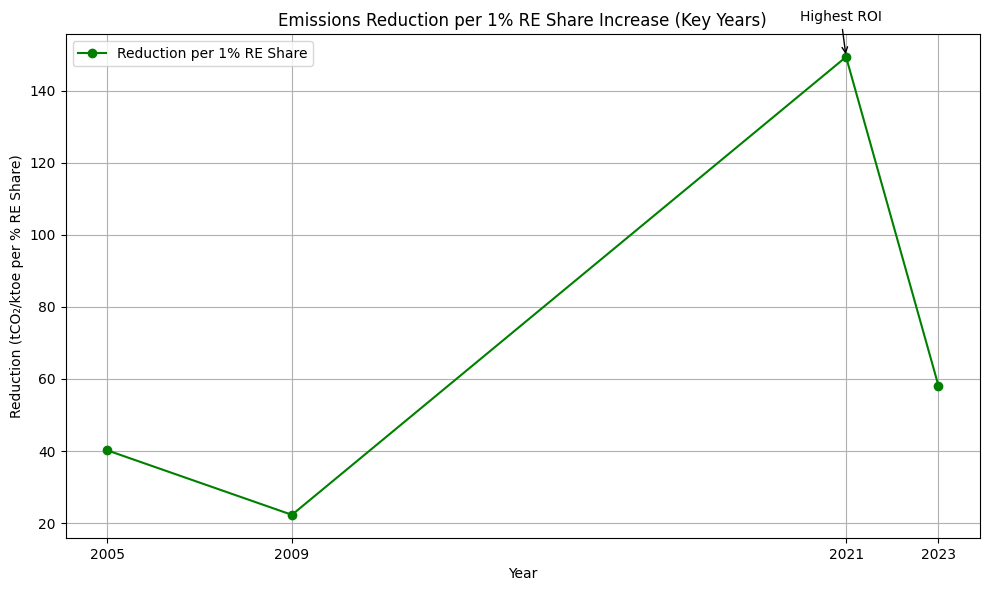

In [49]:
import matplotlib.pyplot as plt

# Data (from your latest result)
years = [2005, 2009, 2021, 2023]
re_share = [10.18, 13.85, 21.89, 24.55]
reduction = [40.17, 22.26, 149.40, 58.12]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, reduction, marker='o', linestyle='-', color='green', label='Reduction per 1% RE Share')

# Annotate highest point
max_idx = reduction.index(max(reduction))
plt.annotate('Highest ROI', xy=(years[max_idx], reduction[max_idx]),
             xytext=(years[max_idx] - 1, reduction[max_idx] + 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Labels & Titles
plt.title("Emissions Reduction per 1% RE Share Increase (Key Years)")
plt.xlabel("Year")
plt.ylabel("Reduction (tCO₂/ktoe per % RE Share)")
plt.grid(True)
plt.xticks(years)
plt.legend()
plt.tight_layout()
plt.show()

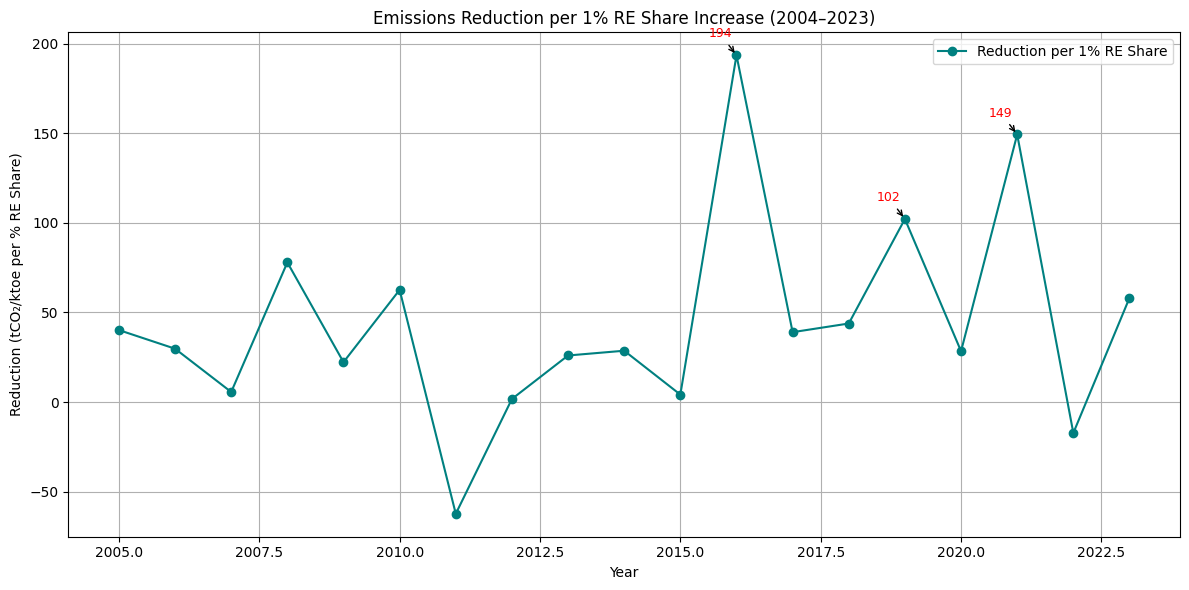

In [50]:
import matplotlib.pyplot as plt

# Prepare data
all_years = merged_roi_df['Year'].tolist()
all_reduction = merged_roi_df['Reduction_per_percent_RE'].tolist()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(all_years, all_reduction, marker='o', linestyle='-', color='teal', label='Reduction per 1% RE Share')

# Highlight spikes: years with high > 90 tCO2/ktoe per % RE
for i, value in enumerate(all_reduction):
    if pd.notnull(value) and value > 90:
        plt.annotate(
            f'{value:.0f}',
            xy=(all_years[i], value),
            xytext=(all_years[i]-0.5, value+10),
            arrowprops=dict(arrowstyle='->', color='black'),
            fontsize=9,
            color='red'
        )

# Chart labels
plt.title("Emissions Reduction per 1% RE Share Increase (2004–2023)")
plt.xlabel("Year")
plt.ylabel("Reduction (tCO₂/ktoe per % RE Share)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

# === Load your cleaned dataframe ===
# Assumes df has columns: ds (datetime), y (GHG Intensity), Sector (optional)

# Example: for one sector (if multiple sectors are present, loop per sector)
# Make sure 'df' is already filtered for a single sector
df_sector = df[["ds", "y"]].copy()

# === Fit the Prophet model ===
model = Prophet()
model.fit(df_sector)

# === Rolling Cross-Validation ===
df_cv = cross_validation(
    model,
    initial='3650 days',   # 10 years of training data
    period='365 days',     # Test every year
    horizon='730 days'     # Forecast 2 years ahead
)

# === Performance Metrics ===
df_perf = performance_metrics(df_cv)
print("📊 Cross-Validation Performance Metrics:")
print(df_perf[['horizon', 'mape', 'rmse', 'coverage']])

# === Plot Performance Metrics ===
plt.figure(figsize=(16, 5))

# MAPE Plot
plt.subplot(1, 3, 1)
plt.plot(df_perf['horizon'].dt.days, df_perf['mape'], marker='o', label='MAPE')
plt.xlabel("Horizon (days)")
plt.ylabel("MAPE")
plt.title("📉 MAPE vs Forecast Horizon")
plt.grid(True)

# RMSE Plot
plt.subplot(1, 3, 2)
plt.plot(df_perf['horizon'].dt.days, df_perf['rmse'], marker='s', color='orange', label='RMSE')
plt.xlabel("Horizon (days)")
plt.ylabel("RMSE")
plt.title("📏 RMSE vs Forecast Horizon")
plt.grid(True)

# Coverage Plot
plt.subplot(1, 3, 3)
plt.plot(df_perf['horizon'].dt.days, df_perf['coverage'], marker='^', color='green', label='Coverage')
plt.xlabel("Horizon (days)")
plt.ylabel("Coverage (%)")
plt.title("📐 Prediction Interval Coverage vs Horizon")
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\rites\anaconda3\envs\pyspark_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'df' is not defined